# Symbolic computation with SymPy
In the previous chapters we have studied methods for solving problems numerically, i.e. to find approximate solutions in particular when the analytical solution is impossible or tedious. 

The [SymPy package](https://docs.sympy.org/) (a Python library for symbolic mathematics) offers an alternative approach and allows to do symbolic computation, i.e. the algebraic manipulation of expressions, in Python in a very natural way. 

## Basics

Let us start with a very simple example that demonstrates the difference between numerical and symbolic computation. To compute the square root of a number, we can use the `sqrt` function from the `math` module: 

In [1]:
import math
math.sqrt(8)

2.8284271247461903

The result is an irrational number, which we know is not only $2.828...$ but also $\sqrt8 = \sqrt{4\cdot2} = 2\cdot\sqrt2$. However, from the result of the `math.sqrt` function, $2.828...$, this last relation is not obvious. Wouldn't it be nice if Python could tell us this?

In [2]:
import sympy
sympy.init_printing() # enable LaTeX output (or best available)
sympy.sqrt(8)

This is not limited to numerical expressions but can also simplify algebraic expressions. For these we need to define the symbols we want to use:

In [3]:
from sympy import symbols
x, y = symbols('x y')
x

Not only is this symbol now rendered as LaTeX, so it's no longer a simple Python variable called `x`. In addition, we can now use it in expressions without assigning specific values:

In [4]:
f = x + 2*y
f

In [5]:
f - x

In [6]:
fsquare = f**2
fsquare

`expand` can be used to expand the brackets in this symbolic expression:

In [7]:
from sympy import expand
g = expand(fsquare)
g

The inverse of `expand` is `simplify` or, for this specific case, `factor`:

In [8]:
from sympy import simplify, factor
factor(g)

Note that `fsquare`$ = (x+2y)^2$ and `g`$ = x^2+4xy+4y^2$ are not considered to be identical:

In [9]:
fsquare == g

False

but we can compute their difference and see that this is zero:

In [10]:
fsquare - g

Now, is this zero? 🤔

Let us simplify it to see:

In [11]:
simplify(fsquare - g)

To evaluate an expression with a concrete value, we can use `subs`:

In [12]:
f.subs(x, 3)

or for several values

In [13]:
f.subs([(x, 3), (y, 4)])

This evaluates to a simple number as you would expect. What about the $\sqrt8$ from above? For this, we can also retrieve the numeric value using `evalf`:

In [14]:
from sympy import sqrt, evalf
w8 = sqrt(8)
w8

In [15]:
w8.evalf()

To convert numbers into algebraic expressions, we can use `S()`:

In [16]:
from sympy import S
print(1/2)
print(S(1)/2)

0.5
1/2


## Calculus in SymPy and more

So far we have only scratched the surface with the basic algebraic transformations above, and there is no time here to discuss all functionality (and pitfalls) in depth, so we will limit ourselves to some of the most important further applications here.

SymPy can also do differentiation:

In [17]:
from sympy import diff
diff(x**2)

Integration:

In [18]:
from sympy import integrate
integrate(2*x)

Indefinite integral of the standard normal distribution, $\int_{-\infty}^{\infty}\exp(-x^2/2)$:

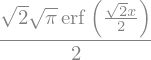

In [19]:
from sympy import exp
integrate(exp(-x**2 / 2))

Or its integral over the real numbers with the symbol `oo` for $\infty$:

In [20]:
from sympy import oo
integrate(exp(-x**2 / 2), (x, -oo, oo))

Compute limits, e.g. $\lim_{x\to0} \frac{\sin(x)}x$:

In [21]:
from sympy import limit, sin
limit(sin(x) / x, x, 0)

Computer eigenvalues of a matrix:

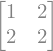

In [22]:
from sympy import Matrix
M = Matrix([[1, 2], [2, 2]])
M

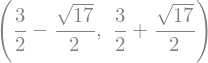

In [24]:
l1, l2 = M.eigenvals()
l1,l2

Series expansions:

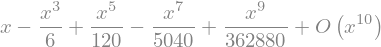

In [25]:
from sympy import series
sin(x).series(x, 0, 10)

Symbolic relations in SymPy are not written with `=` (assignment) or `==` (comparison) but with the special keyword `Eq`:

In [26]:
from sympy import Eq
Eq(x, y)

We can use this to solve the equation $x^2 = -1$ (over the complex or real numbers) in SymPy:

In [27]:
from sympy import solveset
solveset(Eq(x**2, -1), x)

In [28]:
solveset(Eq(x**2, -1), x, domain = S.Reals)

There is a equivalent short-hand notation to solve "expression = 0":

In [29]:
solveset(x**2 + 1, x)

SymPy can also find roots (including their multiplicity), solve systems of linear and non-linear equations and differential equations.

For more information, see the [SymPy documentation](https://docs.sympy.org/latest/index.html), and to get an overview of the possibilities, take a look at the [SymPy Modules Reference](https://docs.sympy.org/latest/modules/index.html).

## Harmonic oscillator in SymPy and SciPy
As an easy example we will take a look at the differential equation that describes a harmonic oscillator and solve it numerically with SciPy and symbolically with SymPy: 
$$\ddot x + \omega_0^2 x = 0 \quad \text{(differential equation of 2nd order)}$$

### SciPy
We start with the numerical solution in SciPy. As with the free-fall example, we rewrite the DE of 2nd order as a system of two coupled DEs of 1st order.

In [30]:
import numpy as np
from scipy.integrate import odeint

def F(y, t):
    # define system of ODEs
    omega0 = 1
    return [y[1], -omega0**2 * y[0]]

What `F` actually defines can be written in this form:
$$\frac{\mathrm d}{\mathrm dt} \left( \begin{matrix}x \\ \dot x\end{matrix} \right) 
    = \left( \begin{matrix} \dot x \\ -\omega_0^2 x \end{matrix} \right)$$

In [31]:
# array of time values to study
t_min = 0
t_max = 10
dt    = 0.1
ts    = np.arange(t_min, t_max+dt, dt)

# initial conditions (x0, v0)
y0 = (1.0, 0.0)

# solve...
y = odeint(F, y0, ts)
# y[:,0] corresponds to position (=height)
# y[:,1] corresponds to velocity

### SymPy
Before plotting the result, we also determine the analytical solution with SymPy, using Sympy's `dsolve` to solve the differential equation.

In [32]:
from sympy import symbols, Function, dsolve
x = symbols('x', cls=Function) # create an undefined function
t, omega0 = symbols('t omega_0') # symbols for time and frequency

In [33]:
omega0

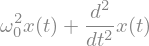

In [34]:
DE = x(t).diff(t).diff(t) + omega0**2 * x(t)
DE

In [35]:
sol_x = dsolve(DE, x(t))
sol_x

Now we use the right-hand side (`rhs`) and our initial conditions ($x(0) = x_0$, $\dot x(0) = v_0$) to obtain the relations from which we can determine $C_1$ and $C_2$.

In [36]:
from sympy import Eq, solve
x0, v0 = symbols("x_0 v_0")
initial1 = Eq(sol_x.rhs.subs(t, 0), x0)
initial1

In [37]:
initial2 = Eq(sol_x.rhs.diff(t).subs(t, 0), v0)
initial2

And we solve these two equations to get $C_1$ and $C_2$

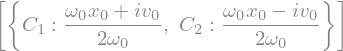

In [38]:
Cs = solve([initial1, initial2])
Cs 

which we substitute in the solution for $f(t)$:

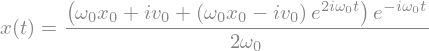

In [39]:
sol_xs = sol_x.subs(Cs[0]) # there is only one solution, so we pick that with [0]
sol_xs = simplify(sol_xs)
sol_xs

Now is this what we would expect? Let us insert the initial conditions from above:

In [40]:
xt = simplify(sol_xs.subs({x0: 1, v0: 0, omega0: 1}))
xt

We also define the velocity:

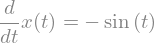

In [41]:
vt = Eq(xt.lhs.diff(t), xt.rhs.diff(t)) # xt.diff(t) doesn't evaluate
vt

### Plotting the results
SymPy has its own plotting function:

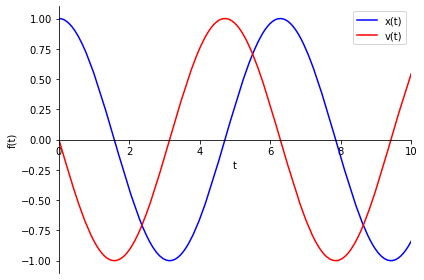

In [42]:
from sympy import plot
p1 = plot(xt.rhs, show=False, xlim = [t_min, t_max], legend = True)
p2 = plot(vt.rhs, show=False)
p1.append(p2[0])
p1[0].label = xt.lhs
p1[1].label = "v(t)"
p1[0].line_color = 'b'
p1[1].line_color = 'r'
p1.show()

To plot the numerical result, we use `matplotlib` as before:

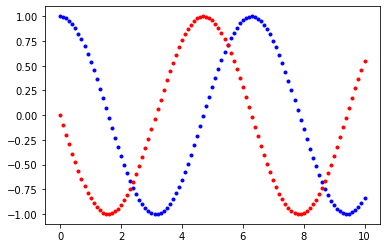

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ts, y[:, 0], "b.", linewidth=2, label = "position")
plt.plot(ts, y[:, 1], "r.", linewidth=2, label = "velocity");